# Transfer Rate Comparison - Marcus vs. MLJ Theory 

### Modelled after https://doi.org/10.1021/acs.jpcc.7b09213

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from mpmath import nsum, exp, inf
import math

#### Parameters & Variables

In [21]:
k = 1.38064852*10**(-23) #[m2*kg/(s2*K)]
k_eV = 8.617333262145*10**(-5) #[eV/K]
hbar = 1.0545718*10**(-34) #[m2*kg / s]
hbar_eV = 6.5821*10**(-16) #[eV/s] 

In [75]:
I_DA = 0.03 #[eV]
lam = 0.3 #[eV]
lam_o = 0.5*0.3 #[eV]
hbar_w_i = 0.165 #[eV]
S_i = 1
sig = 0.05 #[eV]

In [47]:
del_G0_list = np.arange(-1,0.2, 0.01)
T = [5, 20, 50, 150, 300]

### Transfer Rates - Marcus Theory

In [62]:
def Marcus_transfer_rates(del_G0_list, T):
    Marcus_k_list = []
    
    for del_G0 in del_G0_list:
        k_ = (I_DA**2 / hbar_eV) * math.sqrt(math.pi/(lam*k_eV*T)) * math.exp(-(lam+del_G0)**2 / (4*lam*k_eV*T))
        Marcus_k_list.append(k_)
        
    return Marcus_k_list      

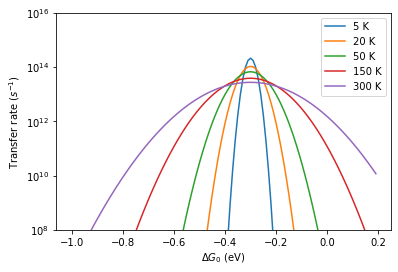

In [64]:
for t in T:
    Marcus_k_list = Marcus_transfer_rates(del_G0_list, t)
    plt.semilogy(del_G0_list, Marcus_k_list, label=str(t)+' K')

plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

##### Including Disorder

In [76]:
def Marcus_disorder_transfer_rates(del_G0_list, T):
    Marcus_disorder_k_list = []
    
    for del_G0 in del_G0_list:
        k_ = (I_DA**2 / hbar_eV) * math.sqrt(math.pi/(lam*k_eV*T+sig**2)) \
        * math.exp(-(lam+del_G0)**2 / (4*lam*k_eV*T+2*sig**2))
        Marcus_disorder_k_list.append(k_)
        
    return Marcus_disorder_k_list

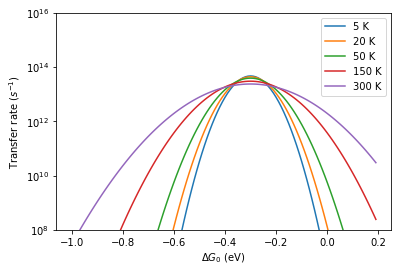

In [77]:
for t in T:
    Marcus_disorder_k_list = Marcus_disorder_transfer_rates(del_G0_list, t)
    plt.semilogy(del_G0_list, Marcus_disorder_k_list, label=str(t)+' K')

plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

##### Comparison

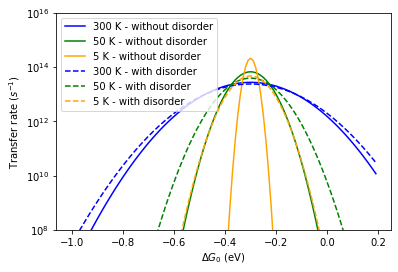

In [82]:
plt.semilogy(del_G0_list, Marcus_transfer_rates(del_G0_list, 300), label='300 K - without disorder', linestyle = '-', color='blue')
plt.semilogy(del_G0_list, Marcus_transfer_rates(del_G0_list, 50), label='50 K - without disorder', linestyle = '-', color='green')
plt.semilogy(del_G0_list, Marcus_transfer_rates(del_G0_list, 5), label='5 K - without disorder', linestyle = '-', color='orange')

plt.semilogy(del_G0_list, Marcus_disorder_transfer_rates(del_G0_list, 300), label='300 K - with disorder', linestyle = '--', color='blue')
plt.semilogy(del_G0_list, Marcus_disorder_transfer_rates(del_G0_list, 50), label='50 K - with disorder', linestyle = '--', color='green')
plt.semilogy(del_G0_list, Marcus_disorder_transfer_rates(del_G0_list, 5), label='5 K - with disorder', linestyle = '--', color='orange')

plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

### Transfer Rates - Marcus Levich Jortner Theory

In [60]:
def MLJ_transfer_rates(del_G0_list, T):
    MLJ_k_list = []
    
    for del_G0 in del_G0_list:
        k_ = (I_DA**2 / hbar_eV) * math.sqrt(math.pi/(lam_o*k_eV*T)) \
        * nsum(lambda v: (math.exp(-S_i)*S_i**v / (math.factorial(v))) \
        * math.exp(-(del_G0+lam_o+v*hbar_w_i)**2 / (4*lam_o*k_eV*T)), [0, inf])
        MLJ_k_list.append(k_)
        
    return MLJ_k_list      

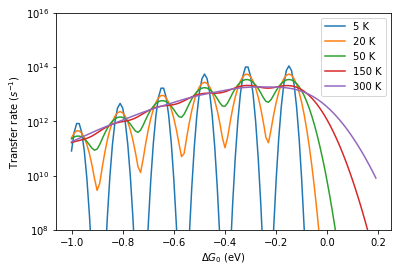

In [68]:
for t in T:
    MLJ_k_list = MLJ_transfer_rates(del_G0_list, t)
    plt.semilogy(del_G0_list, MLJ_k_list, label=str(t)+' K')
    
plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

##### Including Disorder

In [83]:
def MLJ_disorder_transfer_rates(del_G0_list, T):
    MLJ_disorder_k_list = []
    
    for del_G0 in del_G0_list:
        k_ = (I_DA**2 / hbar_eV) * math.sqrt(math.pi/(lam_o*k_eV*T + sig**2)) \
        * nsum(lambda v: (math.exp(-S_i)*S_i**v / (math.factorial(v))) \
        * math.exp(-(del_G0+lam_o+v*hbar_w_i)**2 / (4*lam_o*k_eV*T + 2*sig**2)), [0, inf])
        MLJ_disorder_k_list.append(k_)
        
    return MLJ_disorder_k_list   

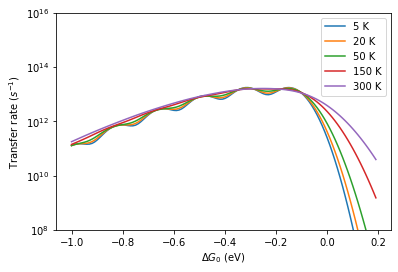

In [84]:
for t in T:
    MLJ_disorder_k_list = MLJ_disorder_transfer_rates(del_G0_list, t)
    plt.semilogy(del_G0_list, MLJ_disorder_k_list, label=str(t)+' K')

plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()

#####  Comparison

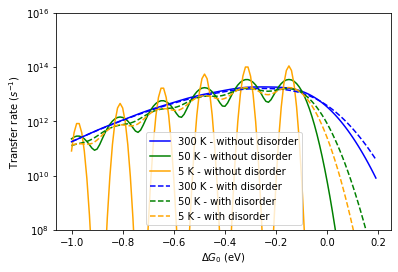

In [85]:
plt.semilogy(del_G0_list, MLJ_transfer_rates(del_G0_list, 300), label='300 K - without disorder', linestyle = '-', color='blue')
plt.semilogy(del_G0_list, MLJ_transfer_rates(del_G0_list, 50), label='50 K - without disorder', linestyle = '-', color='green')
plt.semilogy(del_G0_list, MLJ_transfer_rates(del_G0_list, 5), label='5 K - without disorder', linestyle = '-', color='orange')

plt.semilogy(del_G0_list, MLJ_disorder_transfer_rates(del_G0_list, 300), label='300 K - with disorder', linestyle = '--', color='blue')
plt.semilogy(del_G0_list, MLJ_disorder_transfer_rates(del_G0_list, 50), label='50 K - with disorder', linestyle = '--', color='green')
plt.semilogy(del_G0_list, MLJ_disorder_transfer_rates(del_G0_list, 5), label='5 K - with disorder', linestyle = '--', color='orange')

plt.ylim(10**8, 10**16)
plt.xlabel('$\Delta G_0$ (eV)')
plt.ylabel('Transfer rate ($s^{-1}$)')
plt.legend()
plt.show()